In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# 폰트 관리자
import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)

# 음수 표현
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]=False

In [2]:
# 데이터 불러오기
car_info = pd.read_csv("data/자동차+등록현황(연료별)_20221025141634.csv")
# "계"행 삭제
car_info=car_info.drop(columns=["차종별(1)","연료별(1)"],axis=1)
# 컬럼명 변경
car_info.rename(columns={"차종별(2)":"차종",
                        "연료별(2)":"연료"}, inplace=True)
# "소계"열 삭제
car_info=car_info[car_info["차종"]!="소계"]

# "소계"행 삭제
car_info = car_info[car_info["연료"]!="소계"]

# 칼럼중 -를 0으로 대체
car_info = car_info.replace("-","0")

# 칼럼중 공백 0으로 대체
car_info =car_info.fillna(0)

# 사용할 컬럼만 남기고 삭제 
car_info=car_info[["차종","연료","2017. 01","2017. 12",
                   "2018. 01","2018. 12",
                   "2019. 01","2019. 12",
                   "2020. 01","2020. 12",
                   "2021. 01","2021. 12"]]

# 월별 차량 대수 숫자형 변환
car_info["2017. 01"]=pd.to_numeric(car_info["2017. 01"])
car_info["2017. 12"]=pd.to_numeric(car_info["2017. 12"])
car_info["2018. 01"]=pd.to_numeric(car_info["2018. 01"])
car_info["2018. 12"]=pd.to_numeric(car_info["2018. 12"])
car_info["2019. 01"]=pd.to_numeric(car_info["2019. 01"])
car_info["2019. 12"]=pd.to_numeric(car_info["2019. 12"])
car_info["2020. 01"]=pd.to_numeric(car_info["2020. 01"])
car_info["2020. 12"]=pd.to_numeric(car_info["2020. 12"])
car_info["2021. 01"]=pd.to_numeric(car_info["2021. 01"])
car_info["2021. 12"]=pd.to_numeric(car_info["2021. 12"])

# 연도별 차량등록대수 변화량 행추가
car_info["2017"]=car_info["2017. 12"]-car_info["2017. 01"]
car_info["2018"]=car_info["2018. 12"]-car_info["2018. 01"]
car_info["2019"]=car_info["2019. 12"]-car_info["2019. 01"]
car_info["2020"]=car_info["2020. 12"]-car_info["2020. 01"]
car_info["2021"]=car_info["2021. 12"]-car_info["2021. 01"]

# 차종, 연료, 연도 별 증감량 만들기
car_YoY = car_info[["차종","연료","2017","2018","2019","2020","2021"]].set_index(["차종","연료"])
# 연료별 연도별 연말 등록대수 확인
car_reg = car_info[["차종","연료","2017. 12","2018. 12","2019. 12","2020. 12","2021. 12"]].set_index(["차종","연료"])

car_YoY
car_reg

2017. 12  2018. 12  2019. 12  2020. 12  2021. 12
차종  연료                                                     
승용차 휘발유     1597418   1589567   1604962   1631306   1642186
    경유       728314    744280    727757    722122    708501
    LPG      250286    239192    231089    220302    209333
    전기         4775      9507     14232     20763     35227
    CNG         617       597       510       435       384
    하이브리드     59379     75126     91453    115228    141832
    기타          388       285       203       166       145
    수소           13        83       597      1662      2436
승합차 휘발유        1099      1059      1002      1087      1135
    경유        97003     93190     88472     81554     76372
    LPG       19810     16699     14864     13838     12872
    전기            2        33       127       382       524
    CNG        8664      8621      8529      8262      8134
    하이브리드        52        52        52        52        52
    기타          934      1125      1262      1320      1305
    수소            0         1         2         9         9
화물차 휘발유        1735      1827      1933      2456      2798
    경유       302573    302557    297709    296124    290800
    LPG       31366     28357     25942     24201     22718
    전기           19        23       592      2228      4787
    CNG         447       414       400       416       368
    하이브리드         0         0         0         0         5
    기타         3781      4063      4264      4518      4949
    수소            0         0         0         0         0
특수차 휘발유          18        18        18        18        22
    경유         7349      7760      7982      8487      9068
    LPG          84        80        82       103       118
    전기            1         1         1        20        26
    CNG           3         3         2         1         1
    하이브리드         0         0         0         0         0
    기타          126       131       119       301       636
    수소            0         0         0         0         0

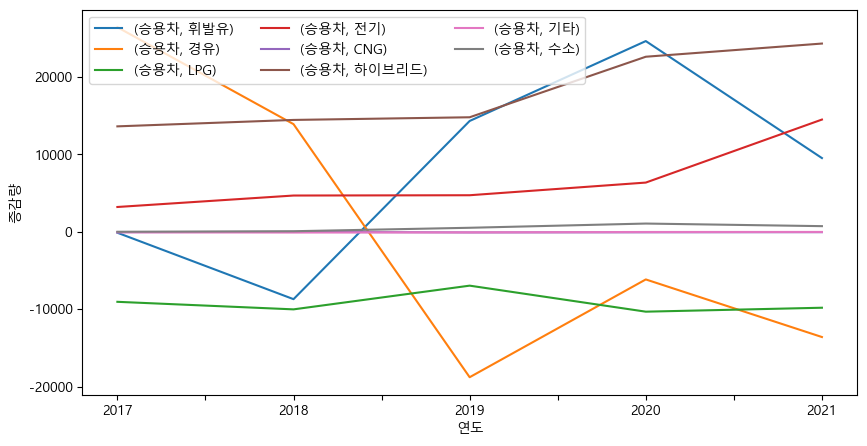

In [3]:
# 연도별 연료별 증감량 그래프 그리기
car_YoY.T.plot(y=["승용차"],xlabel="연도",ylabel="증감량", figsize=(10,5))
plt.legend(loc=2,ncol=3)
# car_YoY.T.plot(y=["승합차"],xlabel="연도",ylabel="증감량", figsize=(10,5))
# car_YoY.T.plot(y=["화물차"],xlabel="연도",ylabel="증감량", figsize=(10,5))
# car_YoY.T.plot(y=["특수차"],xlabel="연도",ylabel="증감량", figsize=(10,5))